<span style="font-size:300%; text-align: center;"><b> Python Pandas Basics </b></span>

- Pandas comes from "Panel Data".
- It is a Python library designed help with this type of data.
- It is very useful for manipulating data and performing some basic analysis.
- Pandas dataframe can used directly with other libraries for analysis.
- There are two main objects: the Series and the Dataframe.


To start, let's import pandas


In [1]:
import pandas as pd  # we import pandas "as pd", which means we refer to pandas as pd throughout the code.

# The DataFrame

To get a sense of how Pandas works, we'll look at a dataframe. Before we do, we'll construct the data with a dictionary, which should be familiar from the previous notebook:

In [2]:
stock_dictionary = {'AAPL': [168, 170, 172], 'MSFT':[78, 80, 82],'AMZN':[1123, 1125, 1127],'KR': [22, 24, 26]}
print(stock_dictionary)

{'AAPL': [168, 170, 172], 'MSFT': [78, 80, 82], 'AMZN': [1123, 1125, 1127], 'KR': [22, 24, 26]}


There are several ways to create a dataframe. You can do this from a dictionary like this:

In [3]:
stock_df = pd.DataFrame(stock_dictionary)
print(stock_df)

   AAPL  MSFT  AMZN  KR
0   168    78  1123  22
1   170    80  1125  24
2   172    82  1127  26


The dataframe has four columns and three rows. I didn't specificy what this was, but we could think of it as the prices for some assets over three periods. Within the dataframe, each column can be manipulated as an individual series. 

For example, let's look at 'AAPL'

## Each column of a dataframe is a series:

In [4]:
aapl = stock_df['AAPL'] # we take stock_df and select column 'AAPL'; we make a series called aapl

In [5]:
print(aapl)

0    168
1    170
2    172
Name: AAPL, dtype: int64


Something to be aware of: setting a series equal to a column does not make a copy - they refer to the same object.


What is the first row of aapl? (A series is indexed similar to a string. To call the index, we must use the iloc function)

In [6]:
aapl.iloc[0]

168

It's the same as in the dataframe. What happens if we change it to zero?

In [8]:
aapl.iloc[0] = 0

print(stock_df)

   AAPL  MSFT  AMZN  KR
0     0    78  1123  22
1   170    80  1125  24
2   172    82  1127  26


It also changes in stock df; the series aapl refers to the series stock_df['AAPL']



## Let's get some more data. An example from Alpha Vantage:

Pandas can read many different file formats. Alpha Vantage has free stock price data through an API. Here, I'll use the demo (which has a demo authorization key) to get MSFT in CSV format.

In [9]:
df = pd.read_csv(r'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=demo&datatype=csv')

In [10]:
print(df.head()) # df.head() gives us the top few rows. We see that the first observations are the last chronologically
# df.head(200) would give us 200 rows

    timestamp    open    high     low   close    volume
0  2019-08-09  138.61  139.38  136.46  137.71  23194600
1  2019-08-08  136.60  138.99  135.93  138.89  27496500
2  2019-08-07  133.79  135.65  131.83  135.28  33414500
3  2019-08-06  133.80  135.68  133.21  134.69  32696700
4  2019-08-05  133.30  133.93  130.78  132.21  42749600


In [11]:
print(df.tail()) # we can also look at the tail

     timestamp    open    high     low   close    volume
95  2019-03-26  118.62  118.71  116.85  117.91  26097700
96  2019-03-25  116.56  118.01  116.32  117.66  27067100
97  2019-03-22  119.50  119.59  117.04  117.05  33624500
98  2019-03-21  117.14  120.82  117.09  120.22  29854400
99  2019-03-20  117.39  118.75  116.71  117.52  28113300


### Time Series Data : the DateTime Variable

What kind of variable is timestamp?

In [12]:
print(df.timestamp.dtype)

object


Object: That's a string. We can't do any datetime operations with strings. We'll need to convert that:

In [13]:
df['timestamp'] = pd.to_datetime(df.timestamp)
print(df.timestamp.dtype)

datetime64[ns]


In [14]:
print(df.timestamp.head()) #it looks the same but it's very different.

0   2019-08-09
1   2019-08-08
2   2019-08-07
3   2019-08-06
4   2019-08-05
Name: timestamp, dtype: datetime64[ns]


With timestamp as a datetime64, we can apply all kinds of time series functions:

In [15]:
df['year'] = df.timestamp.dt.year
df['month'] = df.timestamp.dt.month
print(df.head())

   timestamp    open    high     low   close    volume  year  month
0 2019-08-09  138.61  139.38  136.46  137.71  23194600  2019      8
1 2019-08-08  136.60  138.99  135.93  138.89  27496500  2019      8
2 2019-08-07  133.79  135.65  131.83  135.28  33414500  2019      8
3 2019-08-06  133.80  135.68  133.21  134.69  32696700  2019      8
4 2019-08-05  133.30  133.93  130.78  132.21  42749600  2019      8


I prefer the chronology to go from top to bottom, so let's sort on date:

In [16]:
df.sort_values('timestamp').head()

,timestamp,open,high,low,close,volume,year,month
99,2019-03-20,117.39,118.75,116.71,117.52,28113300,2019,3
98,2019-03-21,117.14,120.82,117.09,120.22,29854400,2019,3
97,2019-03-22,119.50,119.59,117.04,117.05,33624500,2019,3
96,2019-03-25,116.56,118.01,116.32,117.66,27067100,2019,3
95,2019-03-26,118.62,118.71,116.85,117.91,26097700,2019,3


If we call df again, the sort will not have been preserved:

In [17]:
df.head()

,timestamp,open,high,low,close,volume,year,month
0,2019-08-09,138.61,139.38,136.46,137.71,23194600,2019,8
1,2019-08-08,136.60,138.99,135.93,138.89,27496500,2019,8
2,2019-08-07,133.79,135.65,131.83,135.28,33414500,2019,8
3,2019-08-06,133.80,135.68,133.21,134.69,32696700,2019,8
4,2019-08-05,133.30,133.93,130.78,132.21,42749600,2019,8


To properly sort, we have to add "inplace=True" or set the df = df.sort_values('timestamp)

In [18]:
df = df.sort_values('timestamp')
#df.sort_values('timestamp', inplace=True) # does the same thing

In [19]:
df.head(10)

,timestamp,open,high,low,close,volume,year,month
99,2019-03-20,117.39,118.75,116.71,117.52,28113300,2019,3
98,2019-03-21,117.14,120.82,117.09,120.22,29854400,2019,3
97,2019-03-22,119.50,119.59,117.04,117.05,33624500,2019,3
96,2019-03-25,116.56,118.01,116.32,117.66,27067100,2019,3
95,2019-03-26,118.62,118.71,116.85,117.91,26097700,2019,3
94,2019-03-27,117.88,118.21,115.52,116.77,22733400,2019,3
93,2019-03-28,117.44,117.58,116.13,116.93,18334800,2019,3
92,2019-03-29,118.07,118.32,116.96,117.94,25399800,2019,3
91,2019-04-01,118.95,119.11,118.10,119.02,22789100,2019,4
90,2019-04-02,119.06,119.48,118.52,119.19,18142300,2019,4


# Data Manipulation: Calculate Returns and Amihud (2002) Illiquidity Ratio

- Let's get returns close-to-close
- Amihud Illiquidity comes from: 

Amihud, Yakov. "Illiquidity and stock returns: cross-section and time-series effects." Journal of financial markets 5, no. 1 (2002): 31-56.

In [20]:
df['l_close'] = df.close.shift(1)

In [21]:
df.head(10)

,timestamp,open,high,low,close,volume,year,month,l_close
99,2019-03-20,117.39,118.75,116.71,117.52,28113300,2019,3,NaN
98,2019-03-21,117.14,120.82,117.09,120.22,29854400,2019,3,117.52
97,2019-03-22,119.50,119.59,117.04,117.05,33624500,2019,3,120.22
96,2019-03-25,116.56,118.01,116.32,117.66,27067100,2019,3,117.05
95,2019-03-26,118.62,118.71,116.85,117.91,26097700,2019,3,117.66
94,2019-03-27,117.88,118.21,115.52,116.77,22733400,2019,3,117.91
93,2019-03-28,117.44,117.58,116.13,116.93,18334800,2019,3,116.77
92,2019-03-29,118.07,118.32,116.96,117.94,25399800,2019,3,116.93
91,2019-04-01,118.95,119.11,118.10,119.02,22789100,2019,4,117.94
90,2019-04-02,119.06,119.48,118.52,119.19,18142300,2019,4,119.02


In [22]:
df['return'] = (df.close - df.l_close)/df.l_close # manipulating series is similar to manipulating variables in Stata

In [23]:
df.head(10)

,timestamp,open,high,low,close,volume,year,month,l_close,return
99,2019-03-20,117.39,118.75,116.71,117.52,28113300,2019,3,NaN,NaN
98,2019-03-21,117.14,120.82,117.09,120.22,29854400,2019,3,117.52,0.022975
97,2019-03-22,119.50,119.59,117.04,117.05,33624500,2019,3,120.22,-0.026368
96,2019-03-25,116.56,118.01,116.32,117.66,27067100,2019,3,117.05,0.005211
95,2019-03-26,118.62,118.71,116.85,117.91,26097700,2019,3,117.66,0.002125
94,2019-03-27,117.88,118.21,115.52,116.77,22733400,2019,3,117.91,-0.009668
93,2019-03-28,117.44,117.58,116.13,116.93,18334800,2019,3,116.77,0.001370
92,2019-03-29,118.07,118.32,116.96,117.94,25399800,2019,3,116.93,0.008638
91,2019-04-01,118.95,119.11,118.10,119.02,22789100,2019,4,117.94,0.009157
90,2019-04-02,119.06,119.48,118.52,119.19,18142300,2019,4,119.02,0.001428


Amihud is equal to the average daily absolute return divided by total dollar volume:


$ Amihud = \dfrac{1}{T} \sum_{t=1}^T \dfrac{{\mid R_t\mid}}{Price_t \times Volume_t}$

It looks like volume in our data is already in dollars. Let's calculate Amihud monthly with a grouby()

We'll need to import numpy

In [24]:
import numpy as np

df['absret'] = np.abs(df['return']) # I have to write it with the index because return is a reserved word for a method
df['absret_vol'] = df.absret / df.volume

In [25]:
df.head()

,timestamp,open,high,low,close,volume,year,month,l_close,return,absret,absret_vol
99,2019-03-20,117.39,118.75,116.71,117.52,28113300,2019,3,NaN,NaN,NaN,NaN
98,2019-03-21,117.14,120.82,117.09,120.22,29854400,2019,3,117.52,0.022975,0.022975,7.695620e-10
97,2019-03-22,119.50,119.59,117.04,117.05,33624500,2019,3,120.22,-0.026368,0.026368,7.841998e-10
96,2019-03-25,116.56,118.01,116.32,117.66,27067100,2019,3,117.05,0.005211,0.005211,1.925381e-10
95,2019-03-26,118.62,118.71,116.85,117.91,26097700,2019,3,117.66,0.002125,0.002125,8.141584e-11


In [26]:
amihud = df.groupby(['month'])['absret_vol'].mean() # this creates a new series called amihud. it's outside of the df

In [27]:
amihud

month
3    3.811158e-10
4    2.791426e-10
5    4.287097e-10
6    4.127887e-10
7    3.073603e-10
8    4.913871e-10
Name: absret_vol, dtype: float64

If we only have on observation per month, chances are we don't need an entire column in our dataframe with redundant information. This is one feature I like about Pandas over Stata. We can have multiple "datasets" open simultaneously in memory. If we want to make amihud another column in our original df, we have to apply a function:

In [28]:
df['amihud'] = df.groupby(['month'])['absret_vol'].transform(lambda x: x.mean())

In [29]:
df.head(20)

,timestamp,open,high,low,close,volume,year,month,l_close,return,absret,absret_vol,amihud
99,2019-03-20,117.39,118.75,116.71,117.52,28113300,2019,3,NaN,NaN,NaN,NaN,3.811158e-10
98,2019-03-21,117.14,120.82,117.09,120.22,29854400,2019,3,117.52,0.022975,0.022975,7.695620e-10,3.811158e-10
97,2019-03-22,119.50,119.59,117.04,117.05,33624500,2019,3,120.22,-0.026368,0.026368,7.841998e-10,3.811158e-10
96,2019-03-25,116.56,118.01,116.32,117.66,27067100,2019,3,117.05,0.005211,0.005211,1.925381e-10,3.811158e-10
95,2019-03-26,118.62,118.71,116.85,117.91,26097700,2019,3,117.66,0.002125,0.002125,8.141584e-11,3.811158e-10
94,2019-03-27,117.88,118.21,115.52,116.77,22733400,2019,3,117.91,-0.009668,0.009668,4.252946e-10,3.811158e-10
93,2019-03-28,117.44,117.58,116.13,116.93,18334800,2019,3,116.77,0.001370,0.001370,7.473302e-11,3.811158e-10
92,2019-03-29,118.07,118.32,116.96,117.94,25399800,2019,3,116.93,0.008638,0.008638,3.400675e-10,3.811158e-10
91,2019-04-01,118.95,119.11,118.10,119.02,22789100,2019,4,117.94,0.009157,0.009157,4.018236e-10,2.791426e-10
90,2019-04-02,119.06,119.48,118.52,119.19,18142300,2019,4,119.02,0.001428,0.001428,7.872934e-11,2.791426e-10


## Some Plotting Functions

Pandas can make graphs by using Matplotlib in the background.

What does the time series of returns look like?

AxesSubplot(0.125,0.125;0.775x0.755)


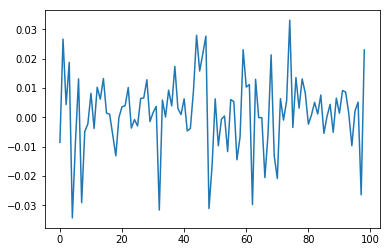

In [31]:
print(df['return'].plot.line())

Can we get a histogram?

AxesSubplot(0.125,0.125;0.775x0.755)


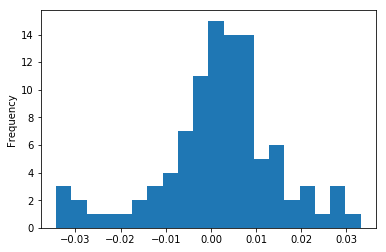

In [32]:
print(df['return'].plot.hist(bins=20))

## Summary Statistics

In [33]:
df.describe() # on the whole dataframe

,open,high,low,close,volume,year,month,l_close,return,absret,absret_vol,amihud
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.0,100.000000,99.000000,99.000000,99.000000,9.900000e+01,1.000000e+02
mean,129.282800,130.243800,128.229300,129.321900,2.415374e+07,2019.0,5.480000,129.237172,0.001687,0.009615,3.678670e-10,3.679994e-10
std,7.339822,7.370765,7.228894,7.252311,7.247862e+06,0.0,1.424745,7.239302,0.013001,0.008861,2.651357e-10,6.933000e-11
min,116.560000,117.580000,115.520000,116.770000,1.362930e+07,2019.0,3.000000,116.770000,-0.034259,0.000000,0.000000e+00,2.791426e-10
25%,123.865000,124.557500,122.922500,123.602500,1.811448e+07,2019.0,4.000000,123.525000,-0.003769,0.003520,1.623919e-10,3.073603e-10
50%,128.750000,130.320000,127.810000,128.915000,2.365630e+07,2019.0,5.000000,128.900000,0.002125,0.006396,3.238781e-10,3.811158e-10
75%,136.445000,137.157500,135.280000,136.430000,2.802158e+07,2019.0,7.000000,136.345000,0.008459,0.013119,5.116986e-10,4.287097e-10
max,141.500000,141.680000,140.300000,141.340000,4.899240e+07,2019.0,8.000000,141.340000,0.033117,0.034259,9.705015e-10,4.913871e-10


In [34]:
df.close.describe() # on a series

count    100.000000
mean     129.321900
std        7.252311
min      116.770000
25%      123.602500
50%      128.915000
75%      136.430000
max      141.340000
Name: close, dtype: float64

The describe() method gives you another dataframe, which you can save

In [ ]:
summary_stats = df.describe()

This exports nicely to a variety of formats.


## Exporting Data

In [ ]:
df.to_stata('msft_returns.dta', write_index=False) #I don't want to include the index
summary_stats.to_excel('msft_sum_stats.xlsx', index=False) # note idiosyncracy between write_index in to_stata and index here

## Importing Data

In [ ]:
df = "rewritten string - we'll need to load the dataframe"
print(df)

In [ ]:
df = pd.read_stata('msft_returns.dta')

In [ ]:
df.head()